In [1]:
import pandas as pd
import json
import requests
import seaborn as sns
import datetime
import numpy as np

In [2]:
global dfUserbooks
global dfRecords
global dfBooks

In [6]:
def loadUserInfo(userId):
    userbooksUrl = "https://pizzagent-e12b9.firebaseio.com/userbooks/{uid}.json".format(uid = userId)
    global dfUserbooks
    global dfRecords
    global dfBooks
    #records
    dfRecords = getRecords(userId)
    dfRecords['date'] = dfRecords['date'].apply(transformDate)
    
    #userbooks
    dfUserbooks = getUserbooks(userId)
    dfUserbooks['dateFinished'] = dfUserbooks['dateFinished'].apply(transformDate)
    dfUserbooks['lastVisit'] = dfUserbooks['lastVisit'].apply(transformDate)

In [3]:
def getRecords(userId):
    url = "https://pizzagent-e12b9.firebaseio.com/records/{id}.json".format(id=userId)
    raw_data = requests.get(url).json()
    records = []
    for key in raw_data.keys():
        book_data = raw_data[key]
        for day in book_data:
            records.append(book_data[day])
    return pd.DataFrame(records)

In [4]:
def getUserbooks(userId):
    url = "https://pizzagent-e12b9.firebaseio.com/userbooks/{id}.json".format(id=userId)
    raw_data = requests.get(url).json()
    userbooks = []
    for key in raw_data.keys():
        userbooks.append(raw_data[key])
    return pd.DataFrame(userbooks)

In [5]:
def transformDate(timestamp):
    if not np.isnan(timestamp):
        return datetime.datetime.fromtimestamp(timestamp/1000)

In [7]:
loadUserInfo("pedro")

In [8]:
dfRecords.tail()

,bookId,date,dateString,id,milisRead,pageStopped,pagesRead
51,-L52Oc3nCh1VuYKnXnmy,2018-02-11,2018-02-11,-L56YQDyB5oWMvVgDbzs,5165143,80,80
52,-L52Oc3nCh1VuYKnXnmy,2018-02-12,2018-02-12,-L573lwV8sh0t0lTjTli,1328253,104,24
53,-L59l-PrmE6y3Ti4V7m_,2018-02-12,2018-02-12,-L5AXWExd_WY_x0_qK1l,2931942,160,160
54,-L5B7CVeWmQHbPiQo1bX,2018-02-12,2018-02-12,-L5Bpow9ccjx1gL0bEzv,1619555,200,200
55,-L5B7Zoyse8fv3QZhCtC,2018-02-12,2018-02-12,-L5BdUDTTII-AZa54Cpn,4685933,312,312


Data from January
Average Minutes Read per day: 34.357025185185186


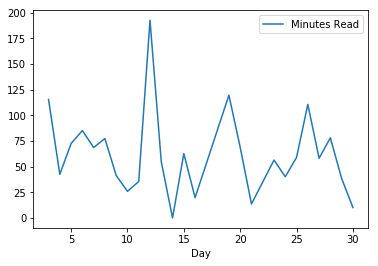

In [9]:
def graph_time(month, year = 2018,time_type = 'M'):
    division = 0
    label = ''
    if time_type == 'M':
        division = 60000
        label = 'Minutes Read'
    elif time_type == 'H':
        division = 3600000
        label = 'Hours Read'
    df = dfRecords[['date', 'milisRead']].copy()
    df = df[df['date'].dt.month == month]
    month_name = df['date'].iloc[0].strftime("%B")
    df['date'] = df['date'].dt.day
    df['milisRead'] = df['milisRead'].apply(lambda x : x/division)
    df.rename(columns = {'milisRead': label, 'date':'Day' }, inplace=True)
    
    print("Data from " + month_name)
    print("Average {lb} per day: {avg}".format(lb = label, avg = df[label].mean()))
    df.groupby('Day').sum().plot()

graph_time(1,'M')

Data from January
Average pages read per day: 56.53333333333333


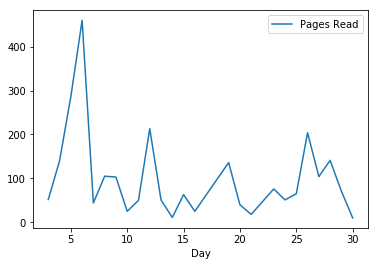

In [10]:
def graph_pages(month):
    df = dfRecords[['date', 'pagesRead']].copy()
    df = df[df['date'].dt.month == month]
    month_name = df['date'].iloc[0].strftime("%B")
    df['date'] = df['date'].dt.day
    df.rename(columns = {'pagesRead': 'Pages Read', 'date':'Day' }, inplace=True)
    
    print("Data from " + month_name)
    print("Average pages read per day: {avg}".format(avg = df['Pages Read'].mean()))
    df.groupby('Day').sum().plot()

graph_pages(1)

Data from January
Average performance: 98.32 pages/hour


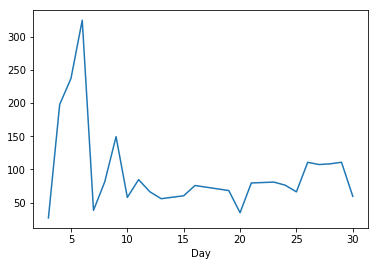

In [11]:
def graph_performance(month):
    df = dfRecords[['date', 'pagesRead', 'milisRead']].copy()
    df = df[df['date'].dt.month == month]
    
    month_name = df['date'].iloc[0].strftime("%B")
    df['date'] = df['date'].dt.day
    df.rename(columns = {'pagesRead': 'Pages Read', 'date':'Day' }, inplace=True)
    df = df.groupby('Day').sum()
    
    df['milisRead'] = df['milisRead'].apply(lambda x: x/3600000)
    df['Performance'] = df['Pages Read'] / df['milisRead']
    df = df[~np.isinf(df['Performance'])]
    print("Data from " + month_name)
    print("Average performance: {avg:.2f} pages/hour".format(avg = df['Performance'].mean()))
    df['Performance'].plot()

graph_performance(1)